In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.datasets import load_iris

In [47]:
random_state = 42
# np.random.seed = random_state
rng = np.random.default_rng(random_state)

In [42]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


missing values

In [54]:
iris.isna().sum().sum()

0

In [49]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(iris, test_size=0.2, stratify=iris['species'], random_state=random_state)

In [50]:
y_col = 'species'

we don't look at testset

In [51]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.841667,3.044167,3.770833,1.204167
std,0.840926,0.445669,1.767417,0.763825
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


but, it's okay to look at the population distribution of the entire dataset(including testset)

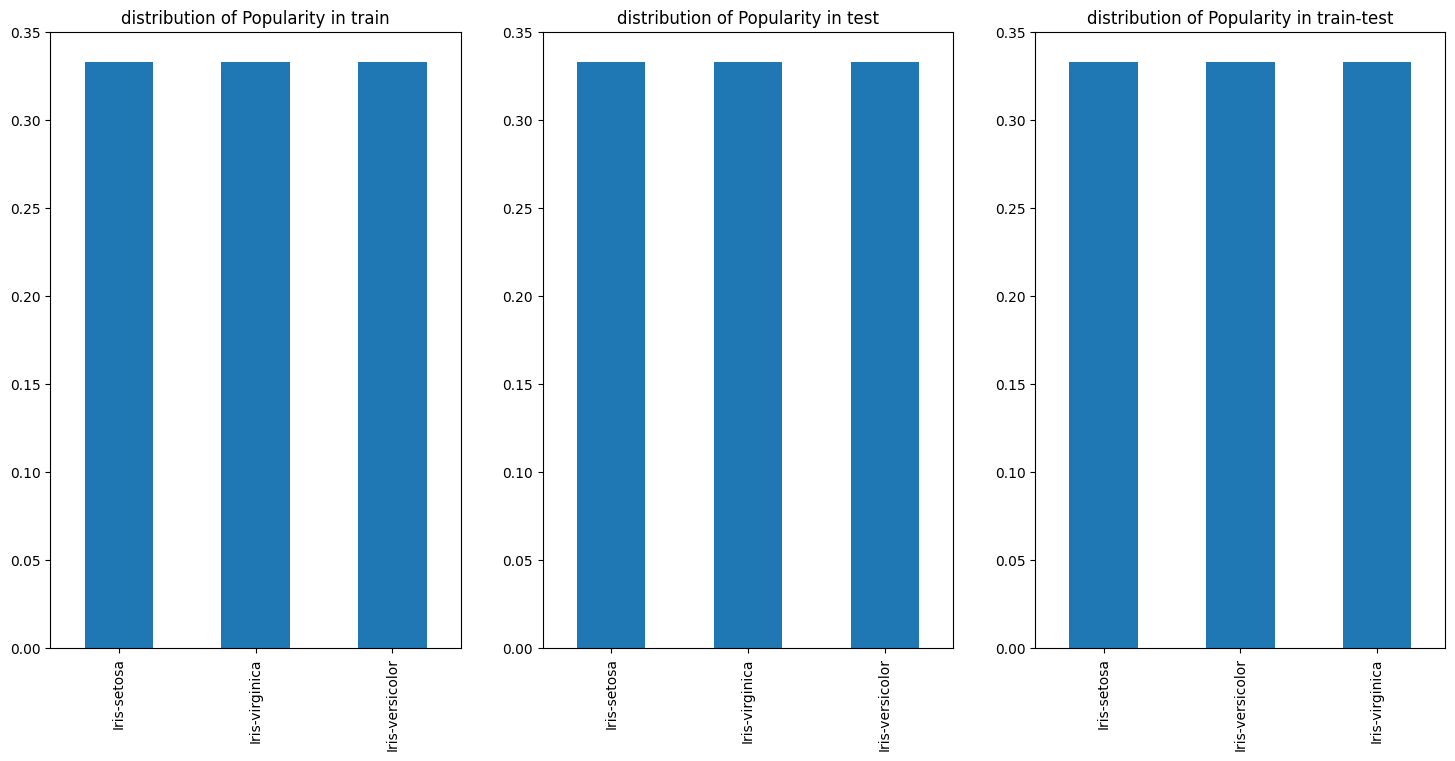

In [52]:
# target distribution in percentage
_, axs = plt.subplots(1, 3, figsize=(18, 8))
train[y_col].value_counts(normalize=True).plot(kind="bar", title="distribution of Popularity in train", ax=axs[0])
test[y_col].value_counts(normalize=True).plot(kind="bar", title="distribution of Popularity in test", ax=axs[1])
iris[y_col].value_counts(normalize=True).plot(kind="bar", title="distribution of Popularity in train-test", ax=axs[2])
plt.show()

population is normally distributed: no target imbalance

# EDA

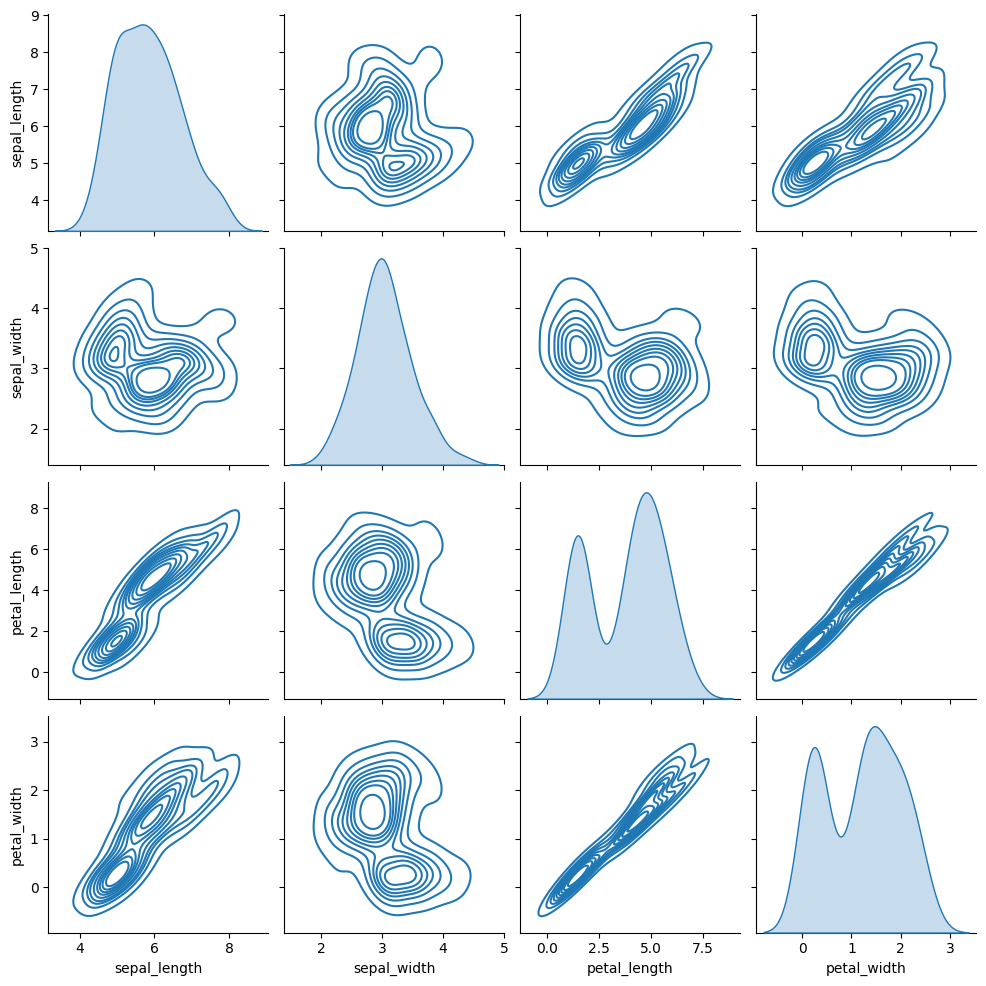

In [ ]:
# Use Pairplot to understand relationships among paramaters
_ = sns.pairplot(train, kind='kde', markers='*')
plt.show()

can't see any significant outliers that would skew the distributions

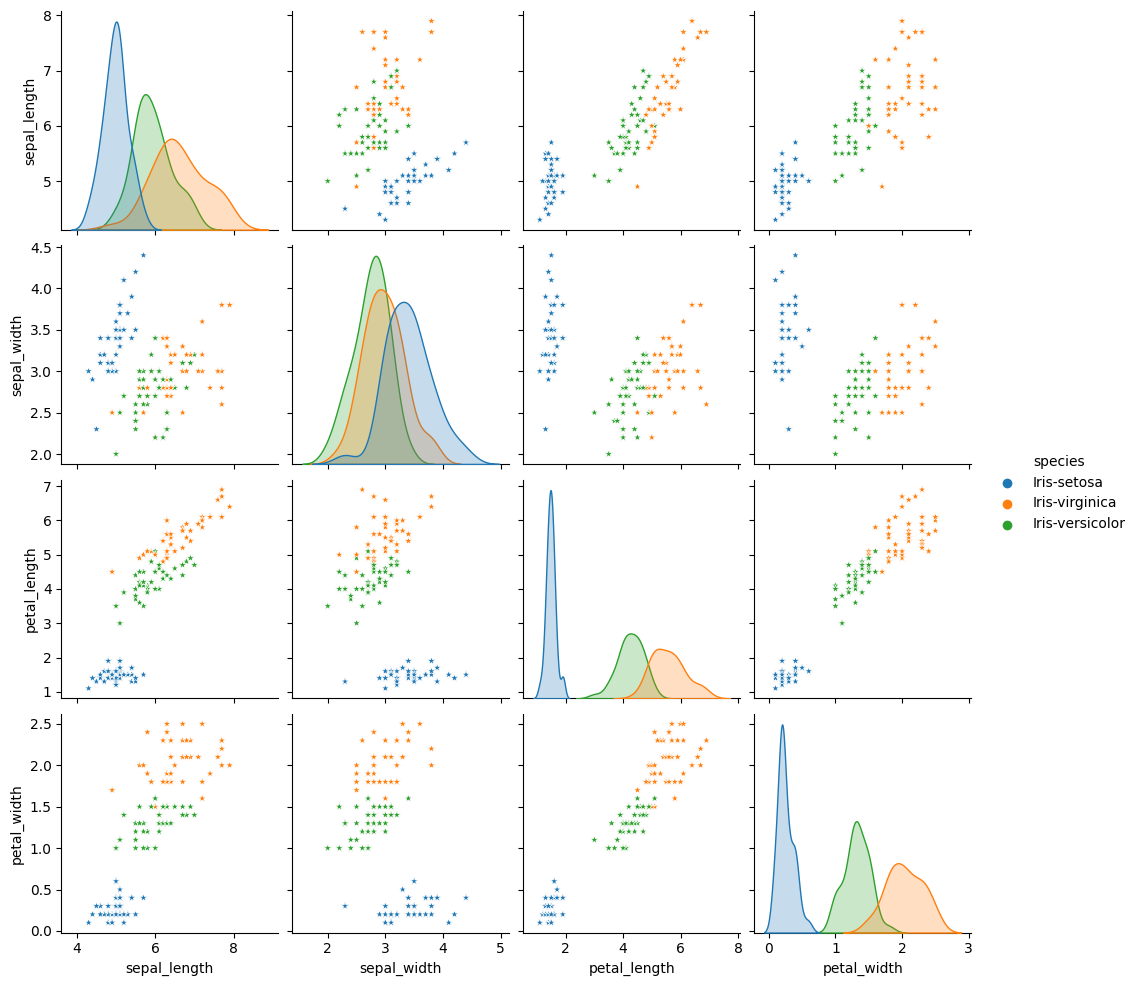

In [68]:
# Use Pairplot to understand relationships among paramaters
_ = sns.pairplot(train, hue='species', markers='*')
plt.show()

* Because Patel length and Petal width have saperable distributions for different iris species, these 2 variables would have higher influence over classifying the species. 
* We can also observe from the scatterplots of `petal_length` x `petal_width`, `petal_width` x `sepal_width` and `petal_width` x `sepal_length`, that the species clusters are clearly distinguishable and can easily be saperated a line. 
* Hence, a sinple linear model(s) would be best suited for this type of classification here, without requiring of any feature transformations as the features are already distinguishable.
* The setosa species is the most easily distinguishable because of its small feature size.

In [31]:
def plot_heatmap(matrix, size=10, title=None):
    labels = matrix.applymap(lambda v: str(np.round(v, decimals=2)) if 1 > np.abs(v) >= .5 else '')
    mask = np.zeros_like(matrix)
    mask[np.tril_indices_from(mask)] = True
    sns.clustermap(matrix, center=0, cmap='vlag', linewidth=1, annot=labels, fmt='')
    plt.title(title)
    plt.show()

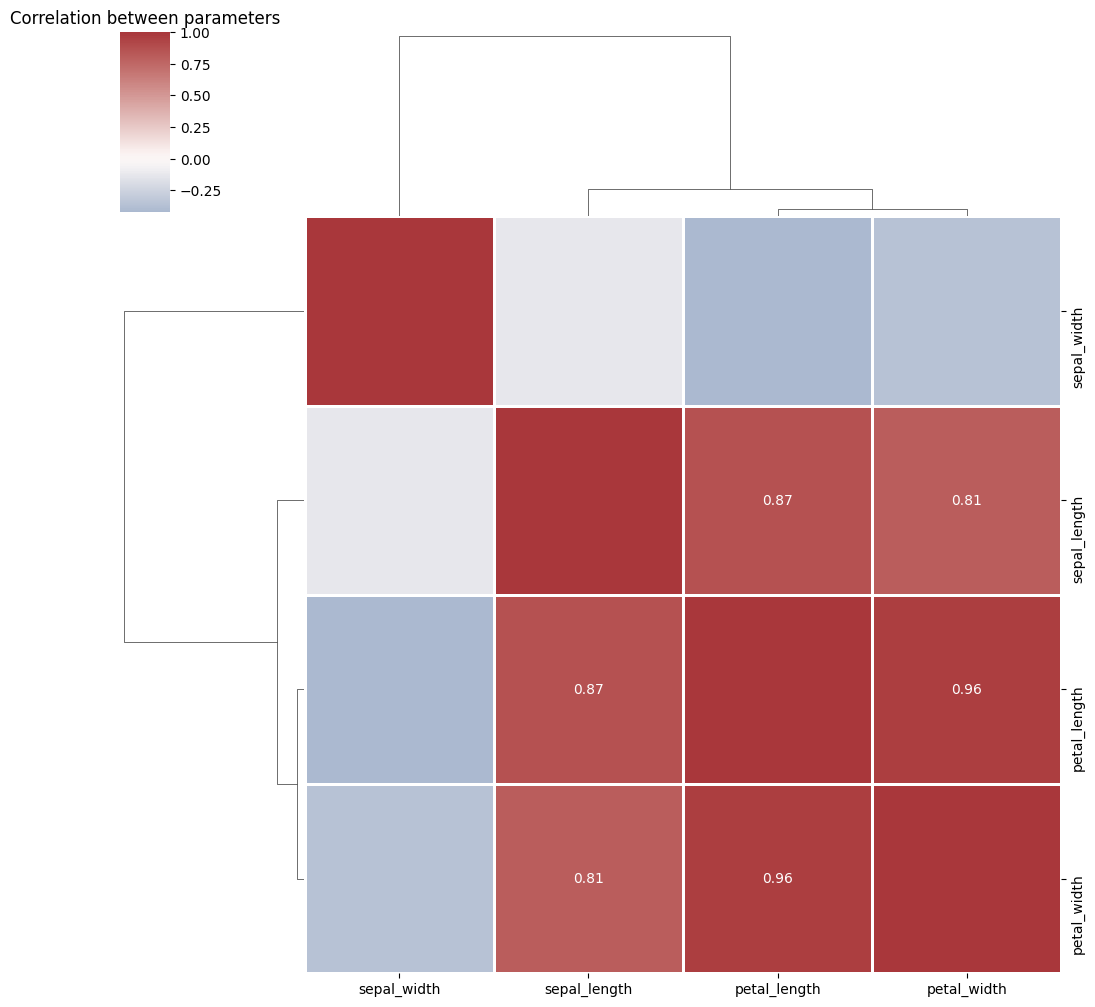

In [32]:
# plot heatmap of correlation between parameters and show only the upper triangle
plot_heatmap(train.corr(), title='Correlation between parameters')

* if we look further we can see that `petal_width` is highly +vely correlated to `petal_length` and `sepal_length`. Similarly, `petal_length` and `sepal_length` are also sognificantly correlated.
* Also, `sepal_width` is slightly -vely correlated with other variables.

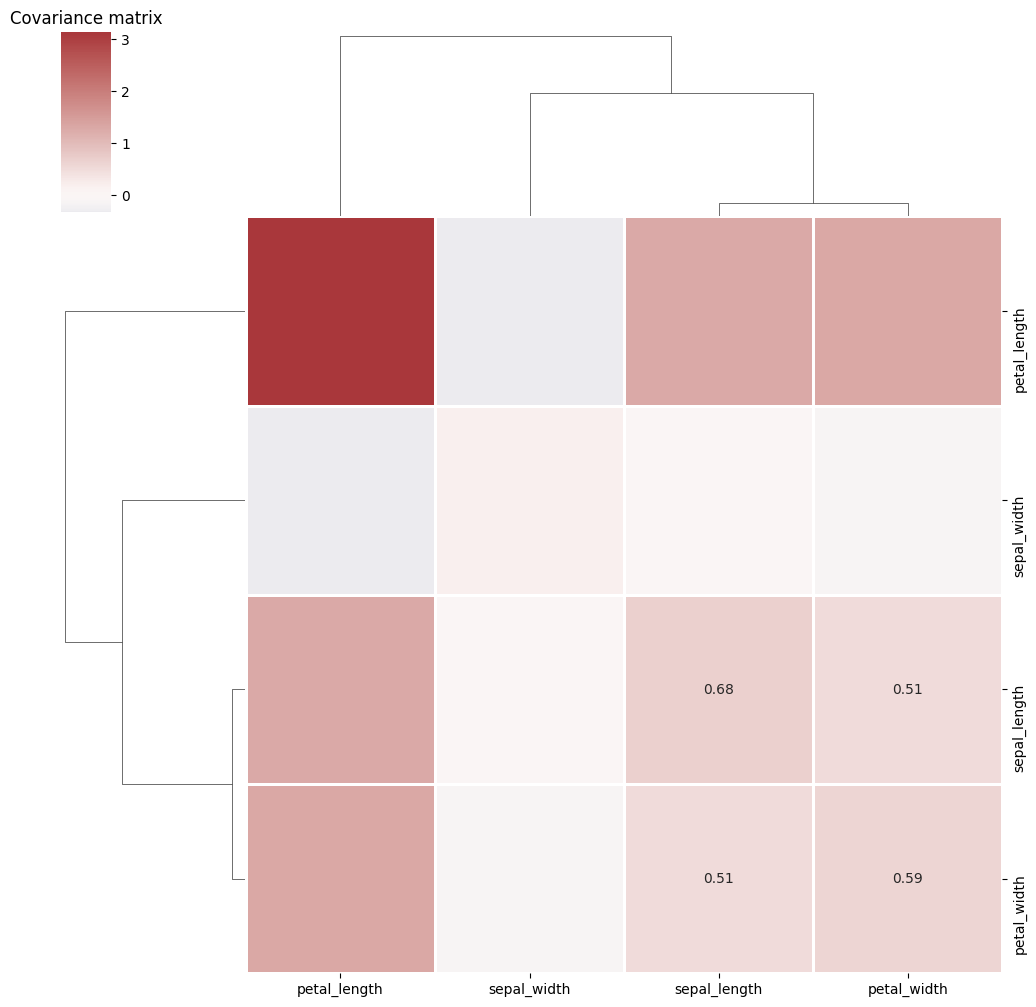

In [40]:
# compute covariance matrix
cov_matrix = np.cov(train.drop('species', axis=1).T)
cov_matrix = pd.DataFrame(cov_matrix, columns=train.columns[:-1], index=train.columns[:-1])
plot_heatmap(cov_matrix, title='Covariance matrix')

A strong correlation is present between petal width and petal length.